In [3]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from img_formation.python.create_grid import *
from img_formation.python.poseVectorToTransformationMatrix import *
from img_formation.python.projectPoints import *

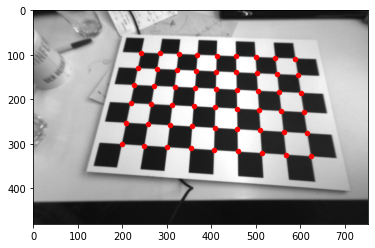

In [8]:
# Load camera poses
# Each row i of matrix 'poses' contains the transformations that transforms
# points expressed in the world frame to points expressed in the camera frame.

pose_vectors = np.loadtxt('img_formation/data/poses.txt')

# Define 3D corner positions
# [Nx3] matrix containing the corners of the checkerboard as 3D points
# (X,Y,Z), expressed in the world coordinate system

k = np.loadtxt('img_formation/data/K.txt')  # calibration matrix [3x3]
d = np.loadtxt('img_formation/data/D.txt')  # distortion coefficients [2x1]

img_idx = 1
path = 'img_formation/data/images_undistorted/'
fname = path + "img_{:04d}.jpg".format(img_idx)

img = Image.open(fname).convert('LA')
img.save(path + "img_grey_{:04d}.png".format(img_idx))

p_W_corners = create_grid(square_size=0.04, num_corners_x=9, num_corners_y=6)

pose_vec = pose_vectors[img_idx - 1]
RT = poseVectorToTransformationMatrix(pose_vec)  # R|T

ones = np.ones((1, len(p_W_corners[0])))
p_C_corners = np.concatenate((p_W_corners, ones))

projected_points = np.dot(RT, p_C_corners)
xpp, ypp = projectPoints(projected_points, k)

im = plt.imread(fname)
implot = plt.imshow(im)
plt.scatter(xpp, ypp, c='r', s=20)
plt.show()